In [474]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import sys
import numpy as np
import h5py
import matplotlib
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d 

matplotlib.rcParams['text.usetex']    = True
matplotlib.rcParams['font.family']    = 'serif'
matplotlib.rcParams['font.size']      = '16'
matplotlib.rcParams['figure.figsize'] = 6.4, 4.8

code_dir = "/global/cfs/cdirs/m3166/buschman/NSaxion-master/python/"   
                                                                                    
sys.path.append(code_dir)                                                           
import theory                                                                       
from scipy.interpolate import interp1d                                              
import NScool_process as NSp 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [590]:
APR = h5py.File('../output/APR_Cat_1.4_SFB-a-T73.hdf5','r')
print(APR.keys())

params = APR['params'][:]
E = APR['E'][:]
alpha = APR['alpha'][:]
spec_1s0n_N100 = APR['1s0n_N100'][:]
spec_1s0n_N1000 = APR['1s0n_N1000'][:]
spec_1s0n_N10000 = APR['1s0n_N10000'][:]
spec_1s0n_N262145 = APR['1s0n_N262145'][:]

raw_rT = APR['raw_rT'][:]
raw_T = APR['raw_T'][:]
raw_ephi = APR['raw_ephi'][:]
raw_dvol = APR['raw_dvol'][:]
raw_dvdr = APR['raw_dvdr'][:]

raw_rTc = APR['raw_rTc'][:]
raw_Tcn = APR['raw_Tcn'][:]
raw_Tcp = APR['raw_Tcp'][:]
raw_kfn = APR['raw_kfn'][:]
raw_kfp = APR['raw_kfp'][:]
raw_mstn = APR['raw_mstn'][:]
raw_mstp = APR['raw_mstp'][:]
raw_state = APR['raw_state'][:]

r_interp = APR['r_interp'][:]
Tcn_interp = APR['Tcn_interp'][:]
T_interp = APR['T_interp'][:]
Rnn = APR['Rnn'][:]
Rnp = APR['Rnp'][:]
Rpp = APR['Rpp'][:]

integrand_r = APR['integrand_r'][:]
integrand_E = APR['integrand_E'][:]
integrand_n = []
integrand_p = []
for i in range(len(integrand_E)):
    integrand_n.append( APR['integrand_n_'+str(i)][:] )
    integrand_p.append( APR['integrand_p_'+str(i)][:] )
    
pbf_1s0n = np.zeros((len(alpha), len(E)))
pbf_1s0p = np.zeros((len(alpha), len(E)))
pbf_3p2A = np.zeros((len(alpha), len(E)))
pbf_3p2B = np.zeros((len(alpha), len(E)))
bremsstrahlung_nn = np.zeros((len(alpha), len(E)))
bremsstrahlung_np = np.zeros((len(alpha), len(E)))
bremsstrahlung_pp = np.zeros((len(alpha), len(E)))

for i in range(len(alpha)):
    pbf_1s0n[i] = APR['1s0n_a'+str(i)][:]
    pbf_1s0p[i] = APR['1s0p_a'+str(i)][:]
    pbf_3p2A[i] = APR['3p2A_a'+str(i)][:]
    pbf_3p2B[i] = APR['3p2B_a'+str(i)][:]
    bremsstrahlung_nn[i] = APR['bremsstrahlung_nn_a'+str(i)][:]
    bremsstrahlung_np[i] = APR['bremsstrahlung_np_a'+str(i)][:]
    bremsstrahlung_pp[i] = APR['bremsstrahlung_pp_a'+str(i)][:]

<KeysViewHDF5 ['1s0n_N100', '1s0n_N1000', '1s0n_N10000', '1s0n_N262145', '1s0n_a0', '1s0n_a1', '1s0n_a2', '1s0p_a0', '1s0p_a1', '1s0p_a2', '3p2A_a0', '3p2A_a1', '3p2A_a2', '3p2B_a0', '3p2B_a1', '3p2B_a2', 'E', 'Rnn', 'Rnp', 'Rpp', 'T_interp', 'Tcn_interp', 'Tcp_interp', 'alpha', 'bremsstrahlung_nn_a0', 'bremsstrahlung_nn_a1', 'bremsstrahlung_nn_a2', 'bremsstrahlung_np_a0', 'bremsstrahlung_np_a1', 'bremsstrahlung_np_a2', 'bremsstrahlung_pp_a0', 'bremsstrahlung_pp_a1', 'bremsstrahlung_pp_a2', 'integrand_E', 'integrand_n_0', 'integrand_n_1', 'integrand_n_2', 'integrand_p_0', 'integrand_p_1', 'integrand_p_2', 'integrand_r', 'params', 'r_interp', 'raw_T', 'raw_Tcn', 'raw_Tcp', 'raw_dvdr', 'raw_dvol', 'raw_ephi', 'raw_kfn', 'raw_kfp', 'raw_mstn', 'raw_mstp', 'raw_rT', 'raw_rTc', 'raw_state']>


Text(0, 0.5, '$\\gamma^6$')

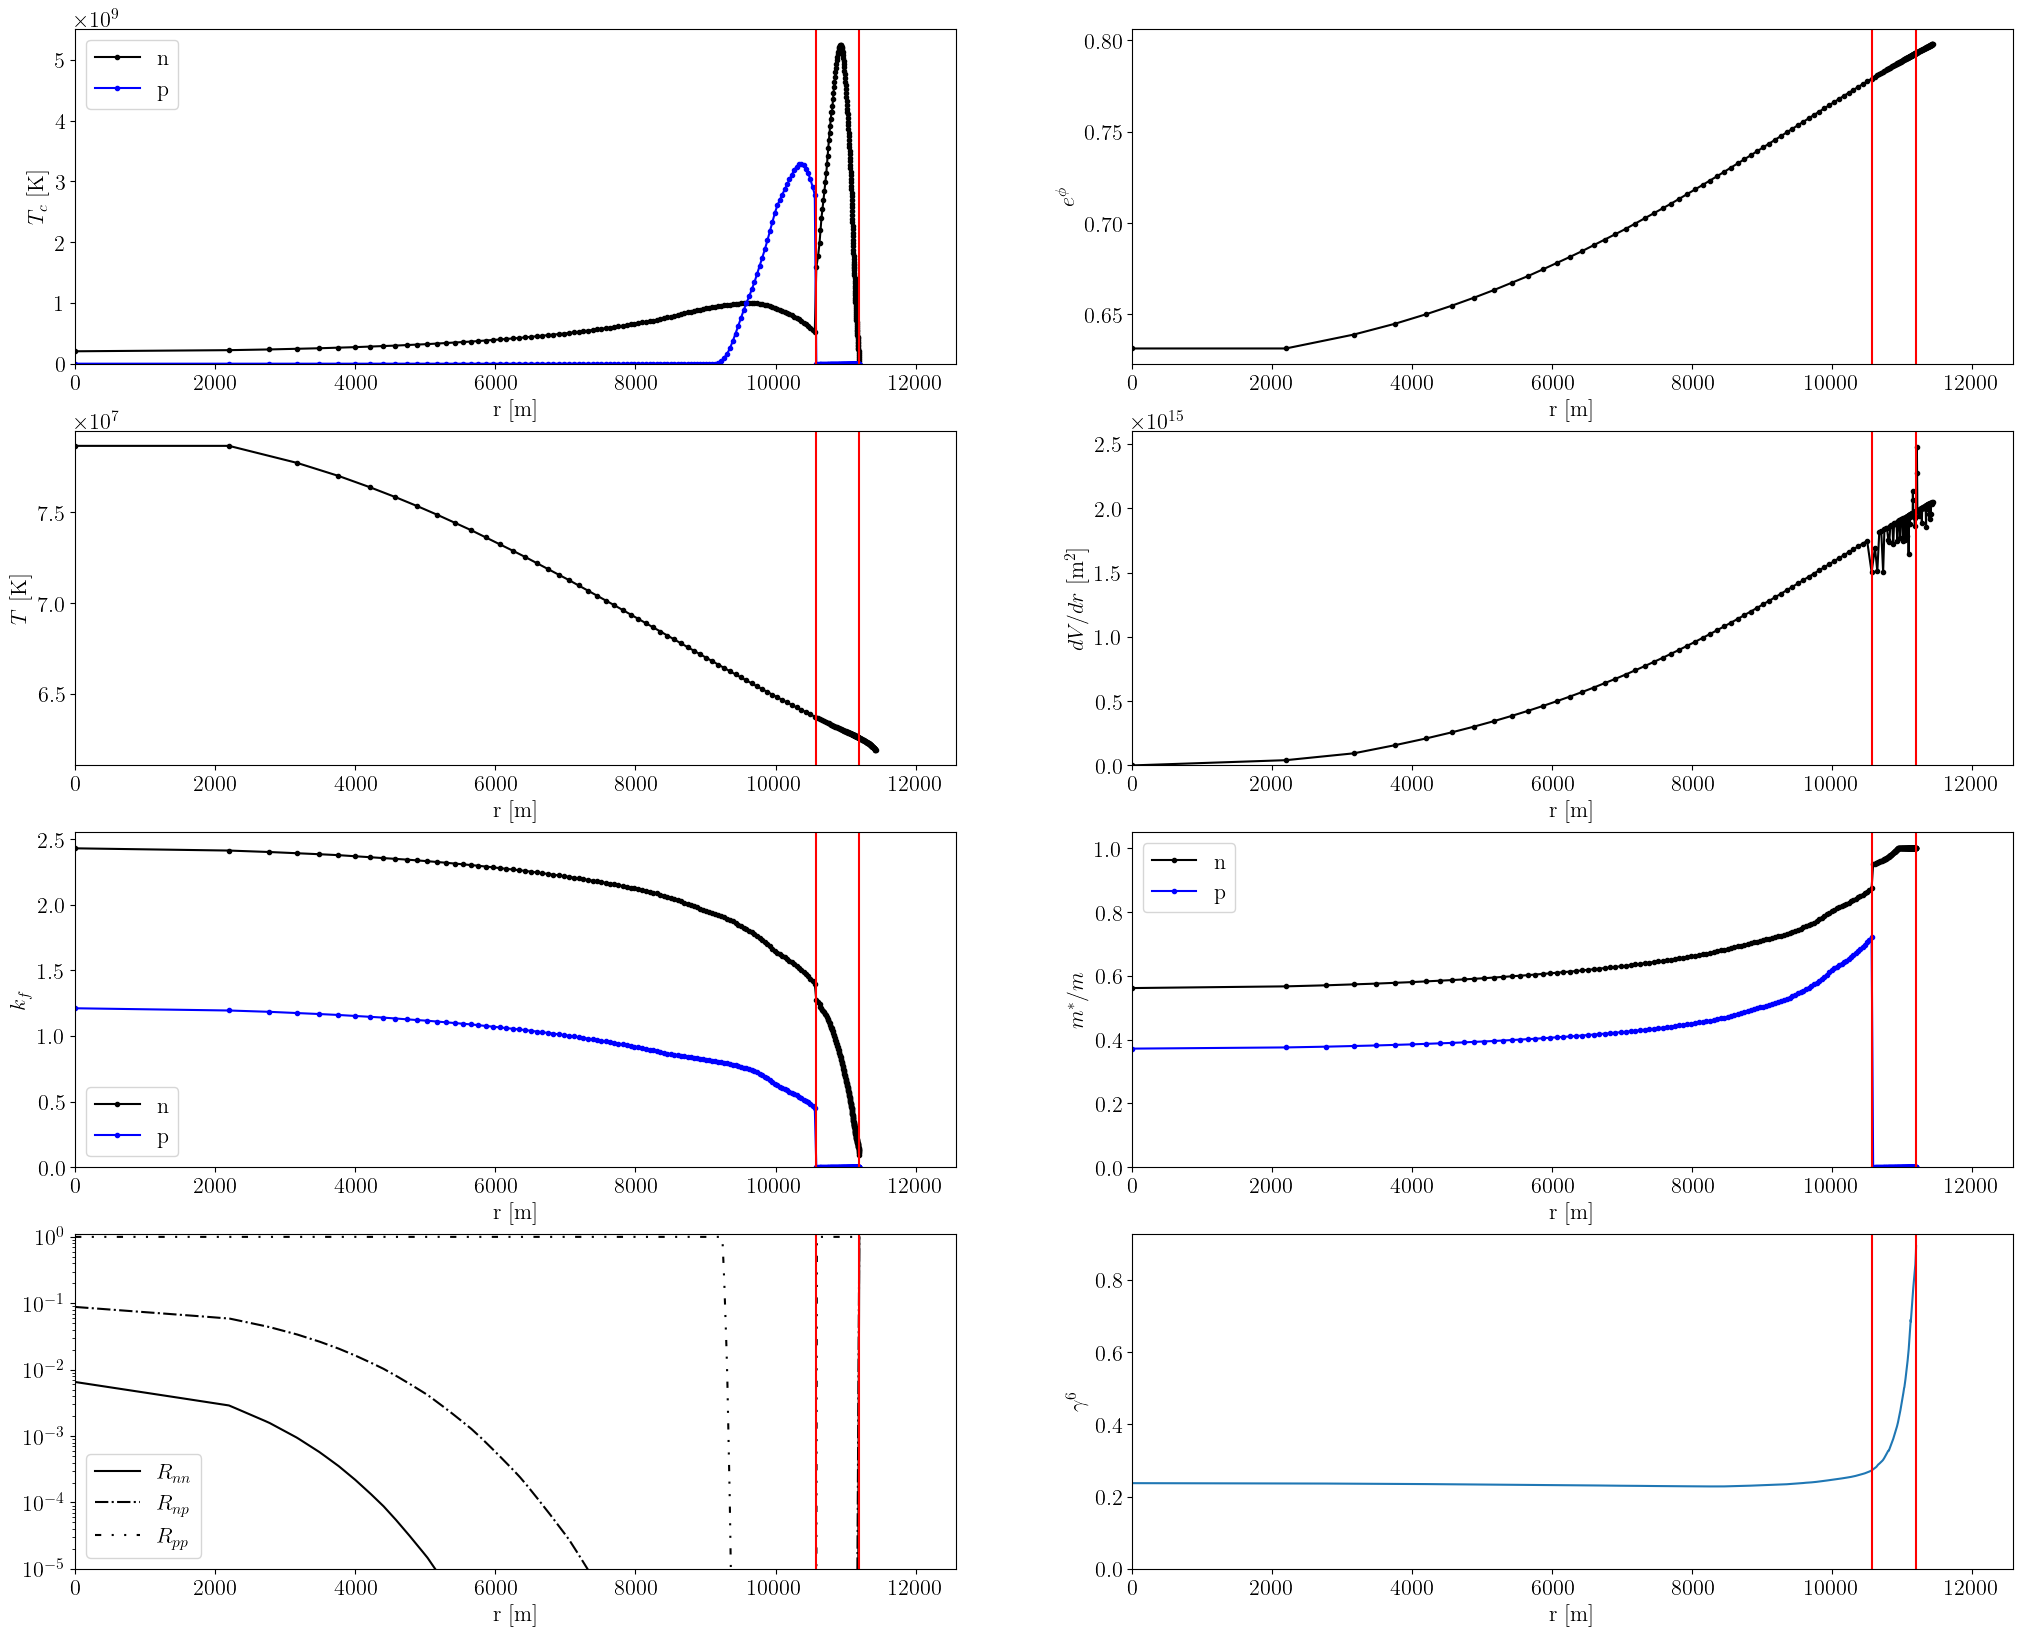

In [445]:
fig, ax = plt.subplots(figsize=(25,20), nrows=4, ncols=2)

ax[0,0].plot(raw_rTc, raw_Tcn, marker='.', label='n', color='black')
#ax[0,0].plot(r_interp, Tcn_interp, marker='', color='orange')
ax[0,0].plot(raw_rTc, raw_Tcp, marker='.', label='p', color='blue')
ax[0,0].legend()

ax[1,0].plot(raw_rT, raw_T, marker='.', color='black')
#ax[1,0].plot(r_interp, T_interp, marker='', color='orange')

ax[0,1].plot(raw_rT, raw_ephi, marker='.', color='black')

ax[1,1].plot(raw_rT, raw_dvdr, marker='.', color='black')

ax[2,0].plot(raw_rTc, raw_kfn, marker='.', color='black', label='n')
ax[2,0].plot(raw_rTc, raw_kfp, marker='.', color='blue', label='p')
ax[2,0].legend()

ax[2,1].plot(raw_rTc, raw_mstn, marker='.', color='black', label='n')
ax[2,1].plot(raw_rTc, raw_mstp, marker='.', color='blue', label='p')
ax[2,1].legend()

ax[3,0].plot(r_interp, Rnn, marker='', color='black', label=r'$R_{nn}$', linestyle='-')
ax[3,0].plot(r_interp, Rnp, marker='', color='black', label=r'$R_{np}$', linestyle='-.')
ax[3,0].plot(r_interp, Rpp, marker='', color='black', label=r'$R_{pp}$', linestyle=(0, (3, 5, 1, 5, 1, 5)))
ax[3,0].legend()
ax[3,0].set_yscale('log')
ax[3,0].set_ylim(1e-5,1.1)

ax[3,1].plot(raw_rTc, 1/(1+1/3*raw_mstn*(raw_kfn/1.68))**6)

for i in [0,1,2,3]:
    for j in [0,1]:
        ax[i,j].set_xlim(0, np.max(raw_rT)*1.1)
        ax[i,j].set_xlabel(r'r [m]')
        ax[i,j].axvline(params[0], color='red')
        ax[i,j].axvline(params[1], color='red')
        
ax[0,0].set_ylim(0,)
ax[1,1].set_ylim(0,)
ax[2,0].set_ylim(0,)
ax[2,1].set_ylim(0,)
ax[3,1].set_ylim(0,)
ax[0,0].set_ylabel(r'$T_c$ [K]')
ax[1,0].set_ylabel(r'$T$ [K]')
ax[0,1].set_ylabel(r'$e^{\phi}$')
ax[1,1].set_ylabel(r'$dV/dr$ [m$^2$]')
ax[2,0].set_ylabel(r'$k_f$')
ax[2,1].set_ylabel(r'$m^*/m$')
ax[3,1].set_ylabel(r'$\gamma^6$')

Text(0, 0.5, '$\\frac{1}{N_{a,\\mathrm{PBF}}}\\frac{d\\epsilon}{dE}$')

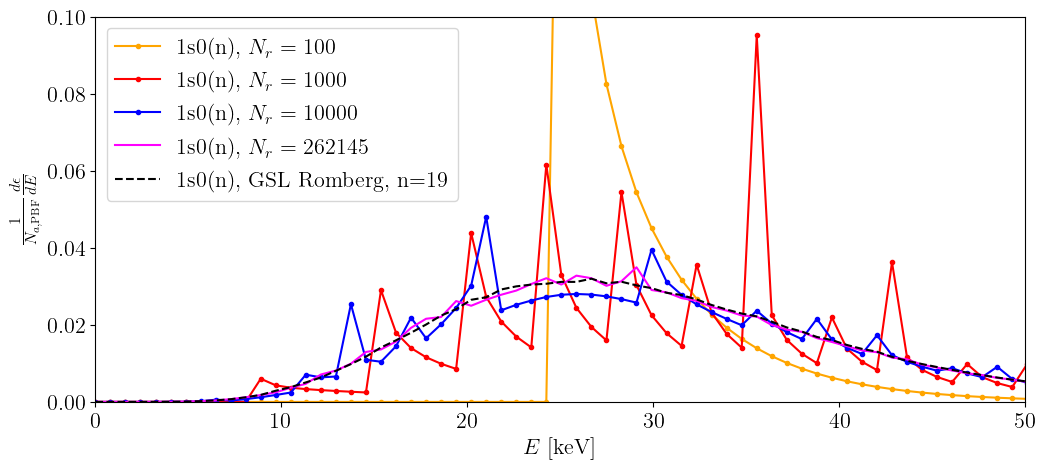

In [618]:
loc = np.where(alpha==1)[0][0]

fig, ax = plt.subplots(figsize=(12,5))
ax.plot(E, spec_1s0n_N100/np.sum(spec_1s0n_N100), marker='.', label=r'1s0(n), $N_r=100$', color='orange')
ax.plot(E, spec_1s0n_N1000/np.sum(spec_1s0n_N1000), marker='.', label='1s0(n), $N_r=1000$', color='red')
ax.plot(E, spec_1s0n_N10000/np.sum(spec_1s0n_N10000), marker='.', label='1s0(n), $N_r=10000$', color='blue')
ax.plot(E, spec_1s0n_N262145/np.sum(spec_1s0n_N262145), marker='', label='1s0(n), $N_r=262145$', color='magenta')

ax.plot(E, pbf_1s0n[loc,:]/np.sum(pbf_1s0n[loc,:]), marker='', label='1s0(n), GSL Romberg, n=19', color='black', linestyle='--')
plt.legend()
plt.ylim(0, 0.1)
plt.xlim(np.min(E), 50)
plt.xlabel(r'$E$ [keV]')
plt.ylabel(r'$\frac{1}{N_{a,\mathrm{PBF}}}\frac{d\epsilon}{dE}$')

#plt.yscale('log')
#plt.ylim(1e-18,)

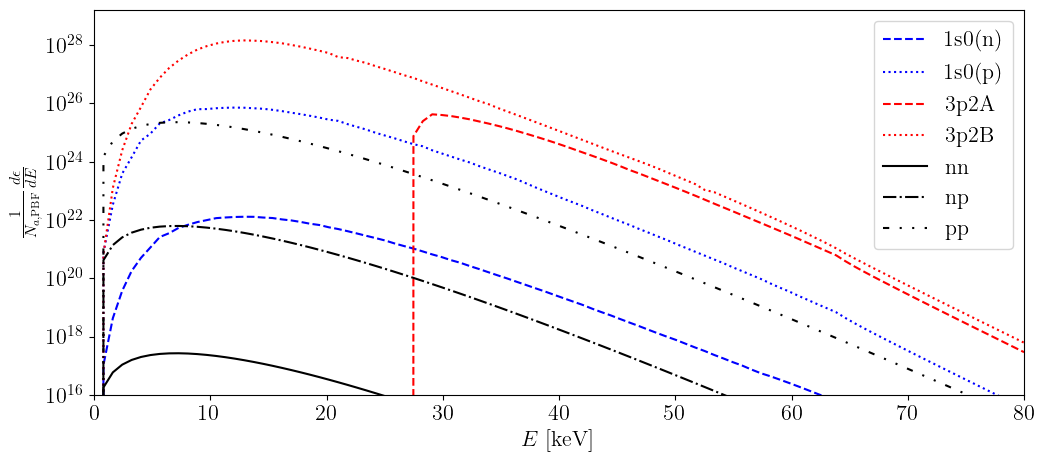

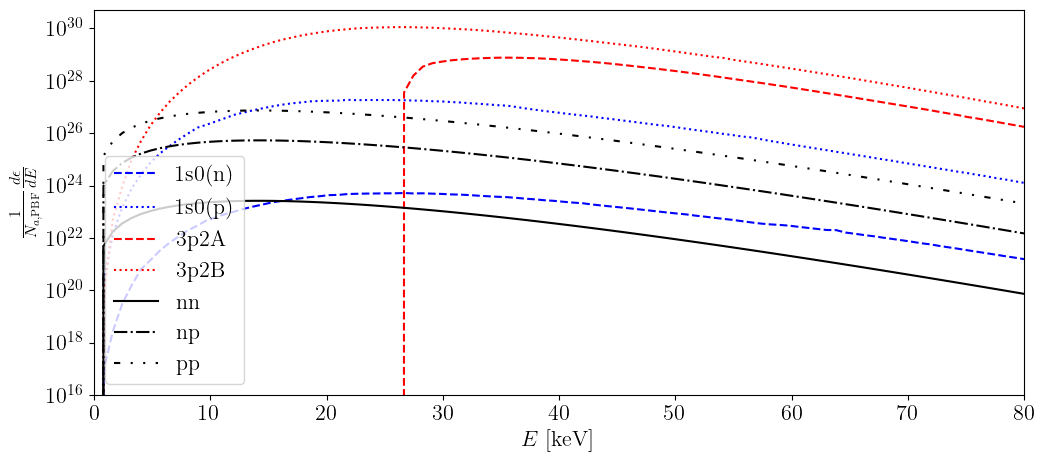

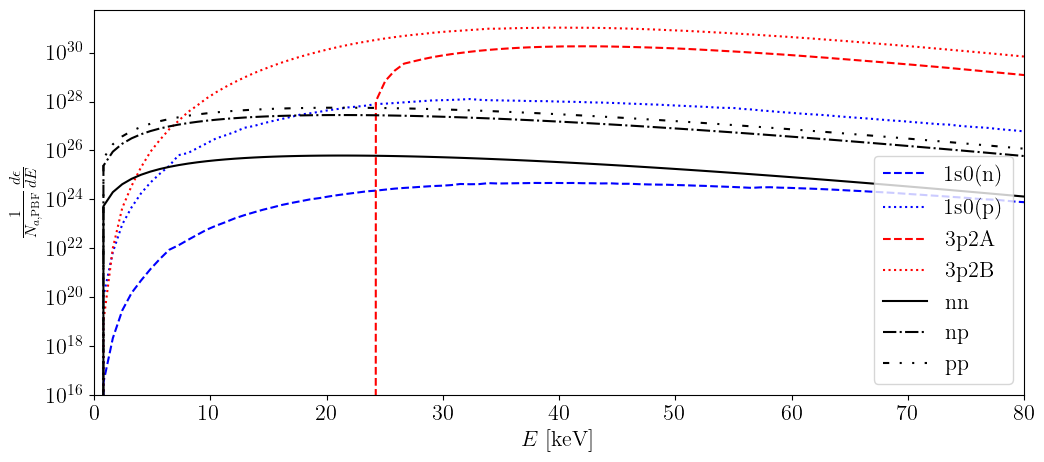

In [601]:
for i in range(len(alpha)):
    fig, ax = plt.subplots(figsize=(12,5))
    ax.plot(E, pbf_1s0n[i], marker='', label='1s0(n)', color='blue', linestyle='--')
    ax.plot(E, pbf_1s0p[i], marker='', label='1s0(p)', color='blue', linestyle=':')
    ax.plot(E, pbf_3p2A[i], marker='', label='3p2A', color='red', linestyle='--')
    ax.plot(E, pbf_3p2B[i], marker='', label='3p2B', color='red', linestyle=':')
    ax.plot(E, bremsstrahlung_nn[i], marker='', label='nn', color='black', linestyle='-')
    ax.plot(E, bremsstrahlung_np[i], marker='', label='np', color='black', linestyle='-.')
    ax.plot(E, bremsstrahlung_pp[i], marker='', label='pp', color='black', linestyle=(0, (3, 5, 1, 5, 1, 5)))
    #ax.plot(E, bremsstrahlung_pp[i]+bremsstrahlung_nn[i]+bremsstrahlung_np[i], marker='', label='total', color='black', linestyle='-')
    #plt.plot(E, dFdE(E, params[2] * K2keV/1.31), label='thermal (old paper)', color='blue', linestyle=':')
    #plt.plot(E, dFdE(E, params[2] * K2keV * alpha[i]) * 3.2e20, label='bremsstrahlung (old paper)', color='blue', linestyle=':')

    plt.legend()
    plt.xlim(np.min(E), 80)
    plt.xlabel(r'$E$ [keV]')
    plt.ylabel(r'$\frac{1}{N_{a,\mathrm{PBF}}}\frac{d\epsilon}{dE}$')

    #plt.ylim(0,)
    plt.yscale('log')
    plt.ylim(1e16,)

In [608]:
N = 50
E_this = np.linspace(1,80,N)
E_mins = E_this[:-1]                                                           
E_maxs = E_this[1:]                                                                                                                                
kwargs={"bins_min": E_mins,"bins_max":E_maxs}  

mod_folder = "../eos/APR_Cat_1.4_SFB-a-T73/" 
NSi = NSp.NScool(mod_folder=mod_folder) 
                                                                                 
NSd=np.array(  [123.])                                                           
NSdd=np.array( [13.])                                                            
NSB0=np.array( [1.5e13])*0.95                                                    
NSdB0=np.array([0.1e13])                                                         
NSdB0 = np.sqrt(NSdB0**2+(0.1*NSB0)**2)   
Bpole = np.array([2.9])*1e13   
NSTeff_infty=np.array(      [0.050])                                                          
NSdTeff_infty=np.array(      [0.014])   
i=0

mse = theory.make_signal_NScool(NSi,Teff_infty=NSTeff_infty[i])              
mse.return_signal(d=NSd[0],B0=Bpole[0]*np.sin(np.pi/2),alpha=alpha[1],
                              superfluid=True,PBF=True,
                              gagg=1e-10,gaee=0.0e-14,gann=1e-10,gapp=1e-10,ma=5e-5,
                              E_min=E[0],E_max=E[-1],N_E=len(E), **kwargs)


dataX=[]
dataY=[]
for i in range(len(E_mins)):
    dataX.append(E_mins[i])
    dataX.append(E_maxs[i])
    dataY.append(mse.binned_flux[i])
    dataY.append(mse.binned_flux[i])

dataX = np.array(dataX)
dataY = np.array(dataY)


2.274759586673224e+26 1.0163004431697823e+29 1.86202432746265e+28


1.0
1.0


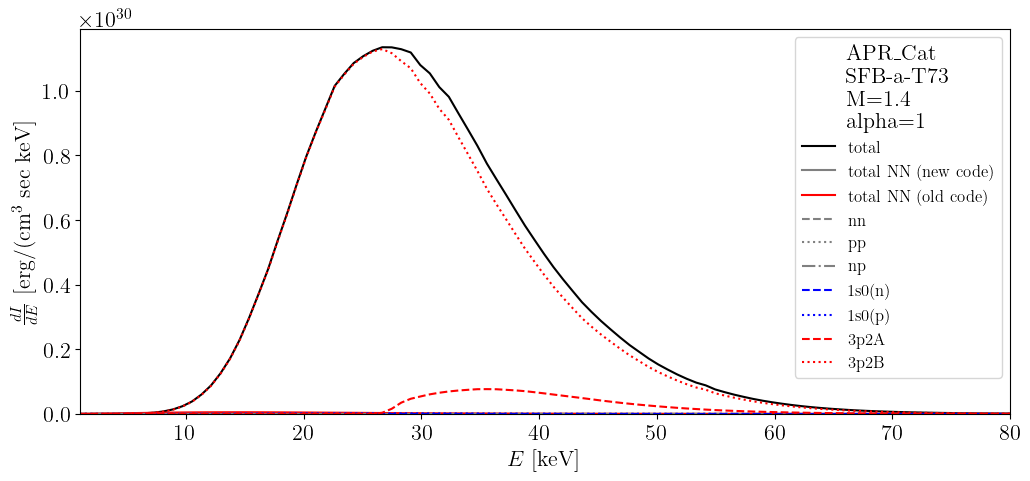

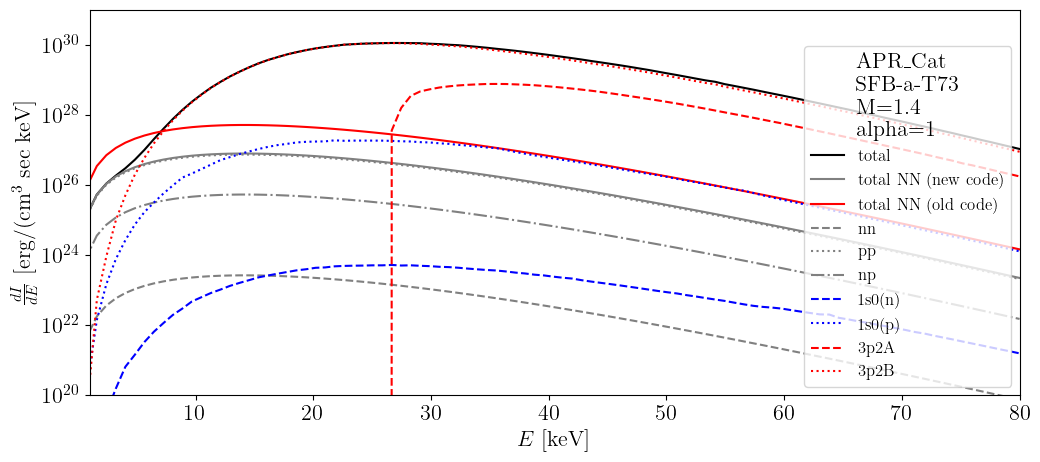

In [617]:
for i in [1]:
    for Log in [False, True]:
        print(alpha[i])
        scal = 1
        fig, ax = plt.subplots(figsize=(12,5))
        ax.plot(E, bremsstrahlung_pp[i]+bremsstrahlung_nn[i]+bremsstrahlung_np[i]+pbf_1s0n[i]+pbf_1s0p[i]+pbf_3p2A[i]+pbf_3p2B[i], marker='', label='total', color='black', linestyle='-')
        ax.plot(E, bremsstrahlung_pp[i]+bremsstrahlung_nn[i]+bremsstrahlung_np[i], marker='', label='total NN (new code)', color='grey', linestyle='-')
        plt.plot(mse.Es, mse.NSi.total_aNN_flux * mse.prim_spec * scal, label='total NN (old code)', color='red')
        ax.plot(E, bremsstrahlung_nn[i], marker='', label='nn', color='grey', linestyle='--')
        ax.plot(E, bremsstrahlung_pp[i], marker='', label='pp', color='grey', linestyle=':')
        ax.plot(E, bremsstrahlung_np[i], marker='', label='np', color='grey', linestyle='-.')

        ax.plot(E, pbf_1s0n[i], marker='', label='1s0(n)', color='blue', linestyle='--')
        ax.plot(E, pbf_1s0p[i], marker='', label='1s0(p)', color='blue', linestyle=':')
        
        ax.plot(E, pbf_3p2A[i], marker='', label='3p2A', color='red', linestyle='--')
        ax.plot(E, pbf_3p2B[i], marker='', label='3p2B', color='red', linestyle=':')

        #plt.plot(mse.Es, mse.NSi.total_ann_flux * mse.prim_spec * scal, label='nn (old code)', color='red', linestyle='--')
        #plt.plot(mse.Es, mse.NSi.total_app_flux * mse.prim_spec * scal, label='pp (old code)', color='red', linestyle=':')
        #plt.plot(mse.Es, mse.NSi.total_anp_flux * mse.prim_spec * scal, label='np (old code)', color='red', linestyle='-.')
        
        plt.xlim(1, 80)
        plt.xlabel(r'$E$ [keV]')
        plt.ylabel(r'$\frac{dI}{dE}$ [erg/(cm$^3$ sec keV]')

        title = 'APR_Cat\n SFB-a-T73\n M=1.4\n alpha=1'
        if Log == False:
            plt.ylim(0,)
            plt.legend(fontsize=12, loc='upper right', title=title)
        else:
            plt.yscale('log')
            plt.ylim(1e20,1e31)
            plt.legend(fontsize=12, loc='lower right', title=title)

In [610]:
np.sum(bremsstrahlung_pp[i]+bremsstrahlung_nn[i]+bremsstrahlung_np[i])

2.2792336144864373e+28

In [611]:
np.sum(pbf_1s0n[i]+pbf_1s0p[i])

5.461832271784247e+28

In [612]:
np.sum(pbf_3p2A[i]+pbf_3p2B[i])

3.1974778568772037e+31